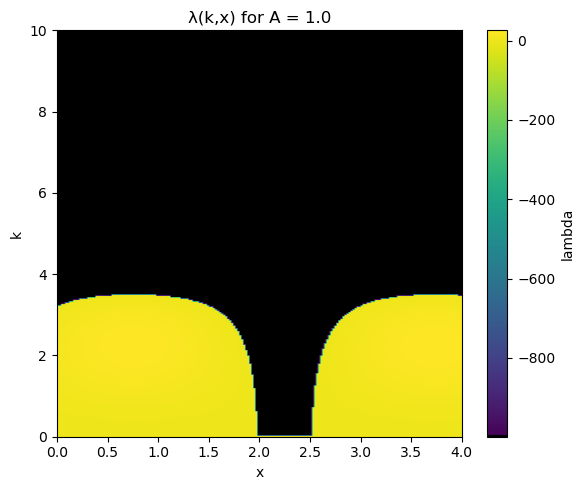

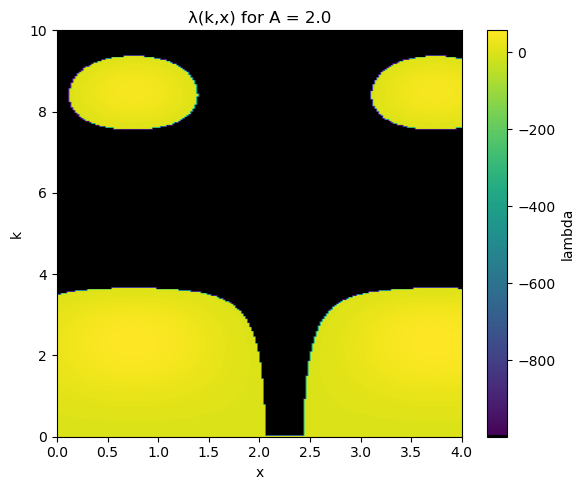

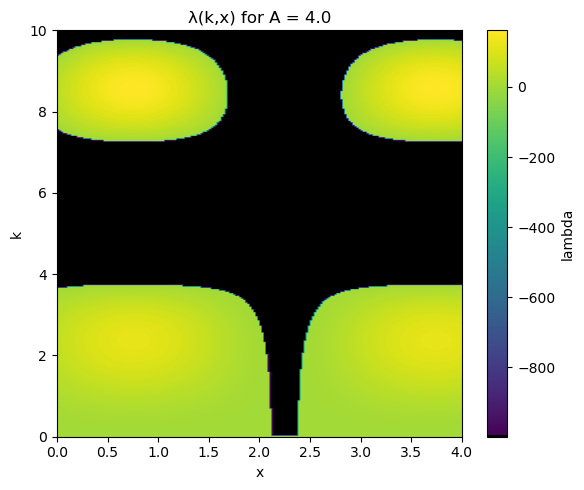

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.special import j1   # Bessel J1

# ==============================
#      参数范围设置
# ==============================
x = np.linspace(0, 4, 200)
k = np.linspace(0, 10, 300)

X, K = np.meshgrid(x, k)
r0=1

# ==============================
#      线性增长率 λ(k,x)
# ==============================
def lambda_func(X, K, A):
    temp = -K**2 + 4*np.pi*A*K*r0*j1(K*r0)*(np.sin(np.pi * X / 1.5 /r0) + 1)
    return temp

# ==============================
#      自定义 colormap:
#      把最低值（对应 λ<0）设置成黑色
# ==============================
base_cmap = plt.cm.viridis
new_colors = base_cmap(np.linspace(0, 1, 256))
new_colors[0] = np.array([0, 0, 0, 1])  # 最小值设为黑色
black_cmap = ListedColormap(new_colors)

# ==============================
#      多个 A 值绘图
# ==============================
A_list = [1.0, 2.0, 4.0]

for A in A_list:
    plt.figure(figsize=(6,5))
    
    lam = lambda_func(X, K, A)

    # λ<0 的区域设置成一个很小的负值
    lam_plot = lam.copy()
    lam_plot[lam_plot < 0] = -999  # 填黑
    
    plt.imshow(
        lam_plot,
        extent=[x.min(), x.max(), k.min(), k.max()],
        aspect='auto',
        origin='lower',
        cmap=black_cmap
    )
    
    plt.colorbar(label='lambda')
    plt.xlabel('x')
    plt.ylabel('k')
    plt.title(f'λ(k,x) for A = {A}')
    
    plt.tight_layout()
    plt.show()
